# Life Cycle of PyGAD

![image](./life_cycle.jpg)

# Eg.1 

## Linear Model Optimization (single objective)

In [1]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

In [2]:
function_inputs = [4, -2, 3.5, 5, -11, -4.7]
desired_output = 44

In [3]:
def fitness_func(ga_instance, solution, solution_idx):
    output = np.sum(solution * function_inputs)
    fitness = 1.0 / np.abs(output - desired_output)
    return fitness

In [5]:
last_fitness = 0

def on_generation(ga_instance):
    global last_fitness
    #  print(f"Generation = {ga_instance.generations_completed}")
    # print(
    #     f"Fitness = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}"
    # )
    # print(
    #     f"Change = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}"
    # )
    last_fitness = ga_instance.best_solution(
        pop_fitness=ga_instance.last_generation_fitness
    )[1]

/Users/OAA/miniforge3/envs/DL/lib/python3.8/site-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/Users/OAA/miniforge3/envs/DL/lib/python3.8/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting f

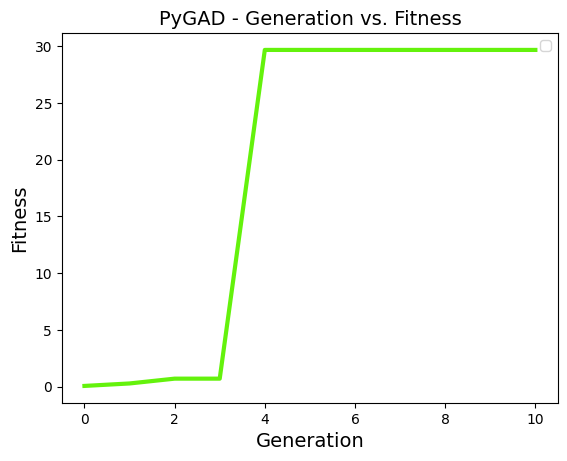

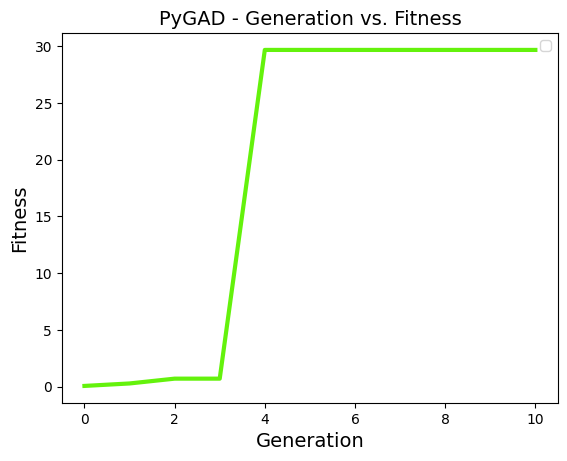

In [6]:
ga_instance = pygad.GA(
    num_generations=10,
    num_parents_mating=4,
    fitness_func=fitness_func,
    sol_per_pop=8,
    num_genes=len(function_inputs),
    init_range_low=-2,
    init_range_high=5,
    parent_selection_type="sss",
    keep_parents=1,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10,
    on_generation=on_generation,
)

ga_instance.run()

ga_instance.plot_fitness()

# fitness_values = ga_instance.best_solutions_fitness
# print(f"Plotting {fitness_values}")
# plt.plot(fitness_values, label="Fitness")
# plt.xlabel('Generation')
# plt.ylabel('Fitness')
# plt.title("Fitness over Generations")
# plt.legend()
# plt.show()

In [7]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")

Parameters of the best solution : [ 3.41719925e+00 -1.84908470e+00  4.73277599e+00  2.46970812e-03
 -1.62859916e+00  1.66488137e+00]
Fitness value of the best solution = 29.69188511345822


In [8]:
prediction = np.sum(np.array(function_inputs) * solution)
print(f"Predicted output based on the best solution : {prediction}")

Predicted output based on the best solution : 44.033679235797216


# Eg. 2

## Linear Model Optimization (multi-objective)

In [11]:
function_inputs1 = [4,-2,3.5,5,-11,-4.7] # Function 1 inputs.
function_inputs2 = [-2,0.7,-9,1.4,3,5] # Function 2 inputs.
desired_output1 = 50
desired_output2 = 30

In [12]:
def fitness_func(ga_instance, solution, solution_idx):
    output1 = np.sum(solution * function_inputs1)
    output2 = np.sum(solution * function_inputs2)
    fitness1 = 1.0 / (np.abs(output1 - desired_output1) + 0.000001)
    fitness2 = 1.0 / (np.abs(output2 - desired_output2) + 0.000001)
    return [fitness1, fitness2]

In [13]:
num_generations = 100
num_parents_mating = 10
sol_per_pop = 20
num_genes = len(function_inputs1)

/Users/OAA/miniforge3/envs/DL/lib/python3.8/site-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/Users/OAA/miniforge3/envs/DL/lib/python3.8/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


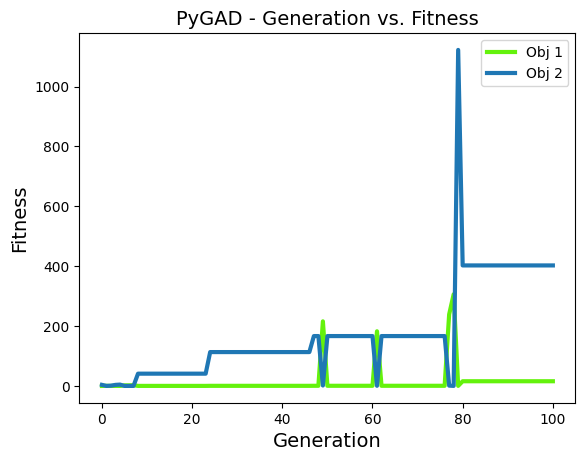

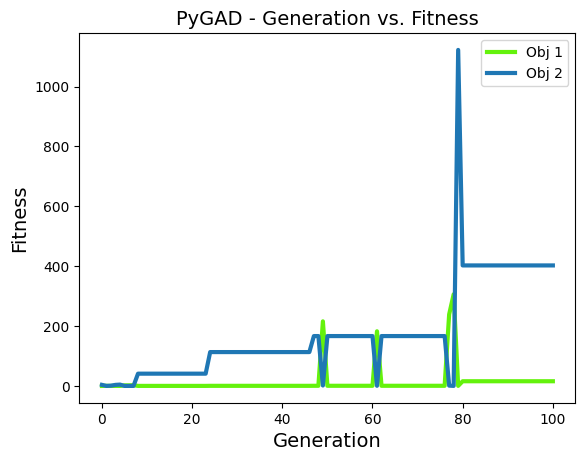

In [14]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       parent_selection_type='nsga2')

ga_instance.run()
ga_instance.plot_fitness(label=["Obj 1", "Obj 2"])

In [15]:
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution: {solution}")
print(f"Fitness value of the best solution: {solution_fitness}")

Parameters of the best solution: [ 4.42776294 -2.77835862 -4.55400384  2.68395099 -3.13037562  1.08909091]
Fitness value of the best solution: [ 15.64550798 402.52600049]


In [17]:
prediction = np.sum(np.array(function_inputs1)*solution)
print(f"Predicted output 1 based on the best solution : {prediction}")
prediction = np.sum(np.array(function_inputs2)*solution)
print(f"Predicted output 2 based on the best solution : {prediction}")

Predicted output 1 based on the best solution : 50.063915109435015
Predicted output 2 based on the best solution : 29.997516688430583


# Eg. 3
## Reproducing Images

### 1. Reading an image

In [24]:
import imageio
import numpy as np

target_im = imageio.imread('fruit.jpg')
target_im = np.asarray(target_im/255, dtype=float)

/var/folders/dj/whhvx2nj1jx6fqgjkcwy_1fc0000gn/T/ipykernel_33129/214052952.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  target_im = imageio.imread('fruit.jpg')


In [27]:
# Fitness Function

import gari

target_chromosome = gari.img2chromosome(target_im)

def fitness_fun(ga_instance, solution, solution_idx):
    fitness = np.sum(np.abs(target_chromosome - solution))

    # Negating the fitness value to make it increasing
    fitness = np.sum(target_chromosome) - fitness
    return fitness

In [28]:
ga_instance = pygad.GA(num_generations = 20000,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0)

ga_instance.run()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


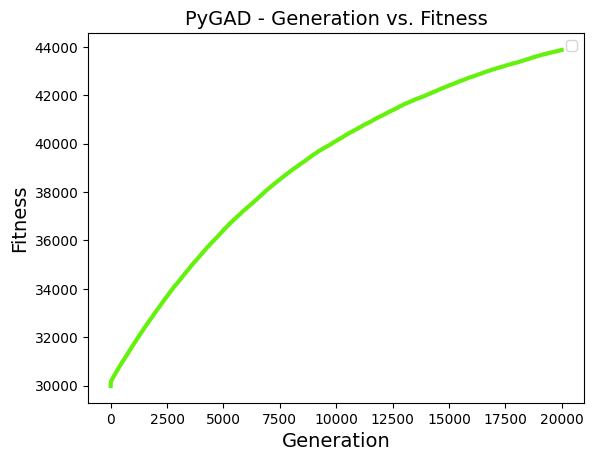

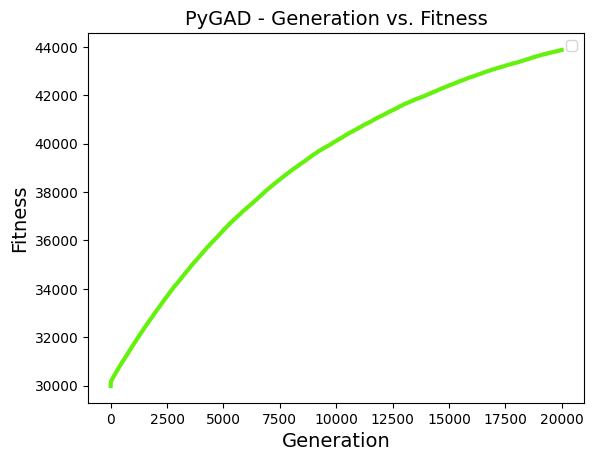

In [29]:
ga_instance.plot_fitness()

Fitness value of the best solution: 43877.937177689615
Index of the best solution: 0
Best fitness valud reached after 19997 generations.


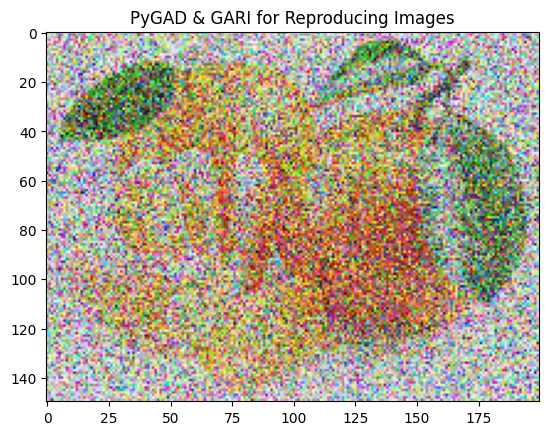

In [30]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Fitness value of the best solution: {solution_fitness}")
print(f"Index of the best solution: {solution_idx}")

if ga_instance.best_solution_generation != 1:
    print(f"Best fitness valud reached after {ga_instance.best_solution_generation} generations.")

result = gari.chromosome2img(solution, target_im.shape)
plt.imshow(result)
plt.title("PyGAD & GARI for Reproducing Images")
plt.show()